# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
#set units to imperial
units = "imperial"
#set up empty lists
cities_returned = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list =[]
cloud_list = []
wind_list = []
country_list = []
date_list = []

#base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#for output status counter
counter = 1


#for loop to loop through city list estabilished by pycity data 
for city in cities:
    
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url)
    data = response.json()
    
    try:
        #append all fields into lists
        cities_returned.append(data["name"])
        lat_list.append(data["coord"]["lat"])
        lng_list.append(data["coord"]["lon"])
        max_temp_list.append(data["main"]["temp_max"])
        humidity_list.append(data["main"]["humidity"])
        cloud_list.append(data["clouds"]["all"])
        wind_list.append(data["wind"]["speed"])
        country_list.append(data["sys"]["country"])
        date_list.append(data["dt"])
        print(f"Processing Record {counter} | {city}")
        counter = counter + 1
    
    except:
        print(f"Processing Record {counter} | {city} not found")
        counter = counter + 1
        pass

Processing Record 1 | punta arenas
Processing Record 2 | busselton
Processing Record 3 | bluff
Processing Record 4 | aksarka
Processing Record 5 | castro
Processing Record 6 | zelenokumsk
Processing Record 7 | tuktoyaktuk
Processing Record 8 | ushuaia
Processing Record 9 | albany
Processing Record 10 | broken hill
Processing Record 11 | kavaratti
Processing Record 12 | locri
Processing Record 13 | kaitangata
Processing Record 14 | alice springs
Processing Record 15 | sawakin
Processing Record 16 | barentsburg not found
Processing Record 17 | nikolskoye
Processing Record 18 | jamestown
Processing Record 19 | vaini
Processing Record 20 | faanui
Processing Record 21 | ulaanbaatar
Processing Record 22 | port alfred
Processing Record 23 | puerto ayora
Processing Record 24 | bengkulu
Processing Record 25 | rikitea
Processing Record 26 | ribeira grande
Processing Record 27 | shimoda
Processing Record 28 | kjollefjord
Processing Record 29 | valparaiso
Processing Record 30 | ambodifototra not f

Processing Record 241 | port augusta
Processing Record 242 | petukhovo
Processing Record 243 | prince rupert
Processing Record 244 | san patricio
Processing Record 245 | mitu
Processing Record 246 | fontem
Processing Record 247 | broome
Processing Record 248 | msanga
Processing Record 249 | najran
Processing Record 250 | biak
Processing Record 251 | savinka
Processing Record 252 | raahe
Processing Record 253 | taber
Processing Record 254 | attawapiskat not found
Processing Record 255 | olafsvik
Processing Record 256 | karpogory
Processing Record 257 | clyde river
Processing Record 258 | atar
Processing Record 259 | ikorodu
Processing Record 260 | salalah
Processing Record 261 | dikson
Processing Record 262 | ketchikan
Processing Record 263 | camacupa
Processing Record 264 | yulara
Processing Record 265 | norman wells
Processing Record 266 | kupang
Processing Record 267 | port hedland
Processing Record 268 | vilyuysk
Processing Record 269 | makakilo city
Processing Record 270 | tokmak
P

Processing Record 483 | pangnirtung
Processing Record 484 | aklavik
Processing Record 485 | papasquiaro not found
Processing Record 486 | ozernovskiy
Processing Record 487 | jiddah not found
Processing Record 488 | margaritesti not found
Processing Record 489 | sur
Processing Record 490 | daru
Processing Record 491 | novoseleznevo
Processing Record 492 | tuatapere
Processing Record 493 | margate
Processing Record 494 | hambantota
Processing Record 495 | ridgecrest
Processing Record 496 | la palma
Processing Record 497 | neropolis
Processing Record 498 | dhidhdhoo
Processing Record 499 | cloquet
Processing Record 500 | filotion
Processing Record 501 | usinsk
Processing Record 502 | deoria
Processing Record 503 | saint-francois
Processing Record 504 | jahrom not found
Processing Record 505 | ranong
Processing Record 506 | xining
Processing Record 507 | ballina
Processing Record 508 | nhulunbuy
Processing Record 509 | dakar
Processing Record 510 | sananduva
Processing Record 511 | rupert


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
#create dataframe
weather_df = pd.DataFrame({
    "City":cities_returned,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloud_list,
    "Wind Speed":wind_list,
    "Country":country_list,
    "Date":date_list
})


#export

weather_df.to_csv("weather_df.csv", index = True)

weather_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,50.00,87,75,8.05,CL,1619113847
1,Busselton,-33.6500,115.3333,57.99,79,100,1.01,AU,1619113847
2,Bluff,-46.6000,168.3333,48.00,96,94,3.00,NZ,1619113847
3,Aksarka,66.5606,67.7975,36.90,90,100,16.22,RU,1619113847
4,Castro,-24.7911,-50.0119,63.70,71,85,1.79,BR,1619113848


In [64]:
summary_stat = weather_df.describe()
summary_stat

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.809927,19.581794,60.996477,65.963303,55.521101,8.745248,1.619114e+09
std,33.623833,91.318851,21.694925,23.829097,37.007154,5.961854,7.817291e+01
min,-54.800000,-179.166700,-13.810000,6.000000,0.000000,0.310000,1.619114e+09
25%,-8.613600,-59.136700,47.680000,50.000000,20.000000,4.250000,1.619114e+09
50%,22.285500,25.716700,63.000000,70.000000,67.000000,7.670000,1.619114e+09
75%,48.279500,102.073800,78.800000,86.000000,90.000000,11.500000,1.619114e+09
max,78.218600,179.316700,105.800000,100.000000,100.000000,41.000000,1.619114e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
weather_filter = weather_df[weather_df["Humidity"] > 100]

weather_filter

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [66]:
#  Get the indices of cities that have humidity over 100%.
print(f"There are {len(weather_filter)} cities over 100% humidity")

There are 0 cities over 100% humidity


In [67]:
#THIS STEP NOT NEEDED AS THERE ARE NO CITIES OVER 100% HUMIDITY 
#Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This graph is showing the tempature over various latitudes. Generally, the tempatures are the higher when you are closer to the equator


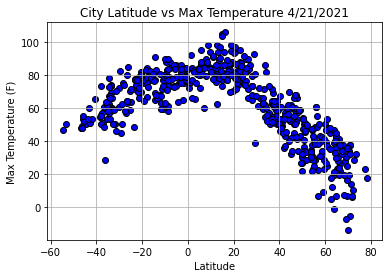

In [84]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],color = "blue", marker = "o", edgecolor = "black")
plt.title("City Latitude vs Max Temperature 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
print("This graph is showing the tempature over various latitudes. Generally, the tempatures are the higher when you are closer to the equator")

## Latitude vs. Humidity Plot

This graph is plotting percent humidity at the locations latitude. There does not appear to be a pattern or trend.


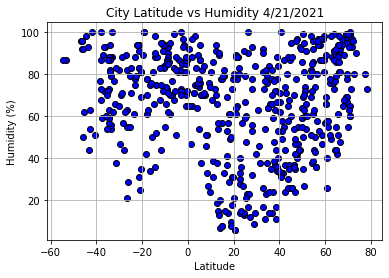

In [86]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],color = "blue", marker = "o", edgecolor = "black")
plt.title("City Latitude vs Humidity 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("This graph is plotting percent humidity at the locations latitude. There does not appear to be a pattern or trend.")

## Latitude vs. Cloudiness Plot

This graph is plotting percent cloudiness at the locations latitude. There does not appear to be a pattern or trend.


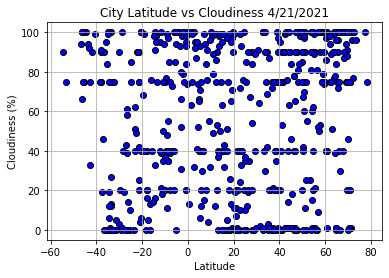

In [87]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color = "blue", marker = "o", edgecolor = "black")
plt.title("City Latitude vs Cloudiness 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print("This graph is plotting percent cloudiness at the locations latitude. There does not appear to be a pattern or trend.")

## Latitude vs. Wind Speed Plot

This graph is plotting windspeed at the locations latitude. There does not appear to be a pattern or trend.


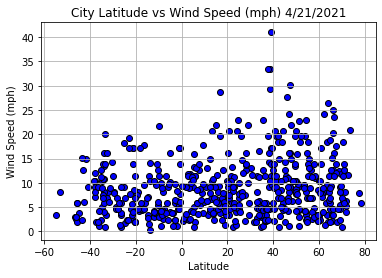

In [88]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],color = "blue", marker = "o", edgecolor = "black")
plt.title("City Latitude vs Wind Speed (mph) 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print("This graph is plotting windspeed at the locations latitude. There does not appear to be a pattern or trend.")

## Linear Regression

In [72]:
#split weather_df into two new dataframes one for southern and one for northern

southern_df = weather_df.loc[weather_df["Lat"]<0]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,50.00,87,75,8.05,CL,1619113847
1,Busselton,-33.6500,115.3333,57.99,79,100,1.01,AU,1619113847
2,Bluff,-46.6000,168.3333,48.00,96,94,3.00,NZ,1619113847
4,Castro,-24.7911,-50.0119,63.70,71,85,1.79,BR,1619113848
7,Ushuaia,-54.8000,-68.3000,46.40,87,90,3.44,AR,1619113697
...,...,...,...,...,...,...,...,...,...
532,Brisbane,-27.4679,153.0281,57.99,62,0,5.75,AU,1619114005
536,Lakes Entrance,-37.8811,147.9810,55.00,73,91,12.12,AU,1619114006
540,Paciran,-6.8767,112.3761,77.47,77,73,3.74,ID,1619113813
541,Tual,-5.6667,132.7500,83.80,72,85,9.66,ID,1619114007


In [73]:
northern_df = weather_df.loc[weather_df["Lat"]>0]
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Aksarka,66.5606,67.7975,36.90,90,100,16.22,RU,1619113847
5,Zelenokumsk,44.4069,43.8806,51.80,87,90,4.47,RU,1619113848
6,Tuktoyaktuk,69.4541,-133.0374,6.80,78,20,9.22,CA,1619113848
8,Albany,42.6001,-73.9662,43.00,44,99,1.01,US,1619113849
10,Kavaratti,10.5669,72.6420,84.16,68,98,9.08,IN,1619113849
...,...,...,...,...,...,...,...,...,...
537,Douentza,14.9951,-2.9517,103.28,8,95,6.04,ML,1619114006
538,Tarko-Sale,64.9225,77.7850,30.00,79,84,1.99,RU,1619114007
539,Plainview,40.7765,-73.4673,48.00,31,40,20.71,US,1619114007
542,Challans,46.8436,-1.8749,68.00,42,0,16.11,FR,1619114008


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7731949427691656
This plot shows tempature in the northern hemisphere by latitude. You can see as you mover further from 
the equator (further from 0) the tempatures trend downward


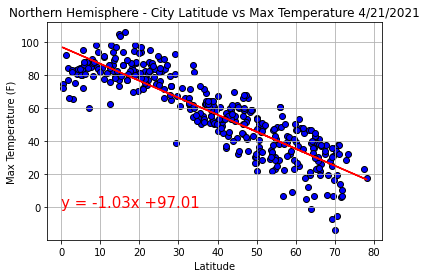

In [90]:
plt.scatter(northern_df["Lat"],northern_df["Max Temp"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs Max Temperature 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"],northern_df["Max Temp"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This plot shows tempature in the northern hemisphere by latitude. You can see as you mover further from \nthe equator (further from 0) the tempatures trend downward")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.507016417581985
This plot shows tempature in the southern hemisphere by latitude. You can see as you mover closer to 
the equator (closer to 0) the tempatures trend upward


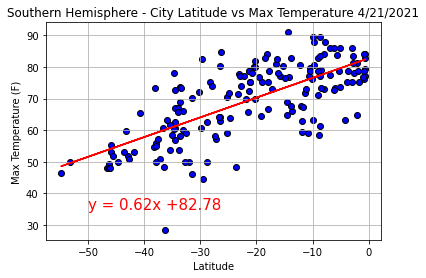

In [91]:
plt.scatter(southern_df["Lat"],southern_df["Max Temp"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs Max Temperature 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"],southern_df["Max Temp"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This plot shows tempature in the southern hemisphere by latitude. You can see as you mover closer to \nthe equator (closer to 0) the tempatures trend upward")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.057201746402431655
This graph is plotting percent humidity at the locations latitude. There does not appear to be a pattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.


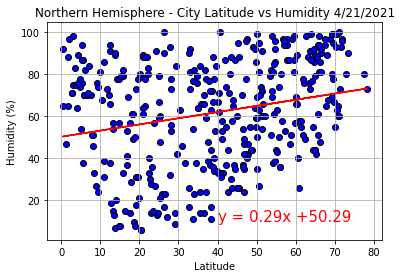

In [92]:
plt.scatter(northern_df["Lat"],northern_df["Humidity"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs Humidity 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"],northern_df["Humidity"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This graph is plotting percent humidity at the locations latitude in the northern hemisphere. There does not appear to be a pattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007561919668013854


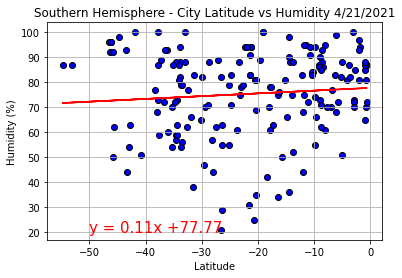

In [79]:
plt.scatter(southern_df["Lat"],southern_df["Humidity"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs Humidity 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"],southern_df["Humidity"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This graph is plotting percent humidity at the locations latitude in the southern hemisphere. There does not appear to be a pattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.021782386361086353
This graph is plotting percent cloudiness at the locations latitude in the northern hemisphere. There does not appear to be a 
pattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.


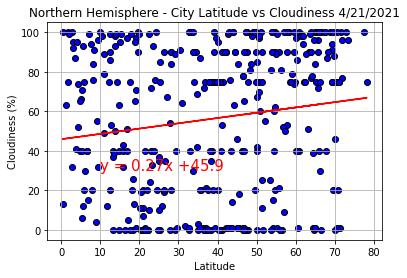

In [94]:
plt.scatter(northern_df["Lat"],northern_df["Cloudiness"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs Cloudiness 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"],northern_df["Cloudiness"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This graph is plotting percent cloudiness at the locations latitude in the northern hemisphere. There does not appear to be a \npattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005141990848463746
This graph is plotting percent cloudiness at the locations latitude in the southern hemisphere. There does not appear to be a 
pattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.


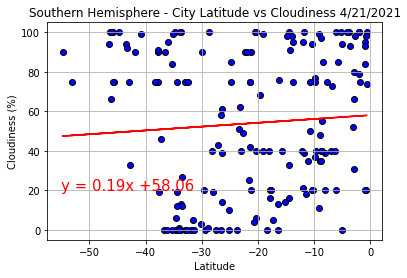

In [95]:
plt.scatter(southern_df["Lat"],southern_df["Cloudiness"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs Cloudiness 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"],southern_df["Cloudiness"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This graph is plotting percent cloudiness at the locations latitude in the southern hemisphere. There does not appear to be a \npattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009082851991464634
This graph is plotting wind speed at the locations latitude in the northern hemisphere. There does not appear to be a 
pattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.


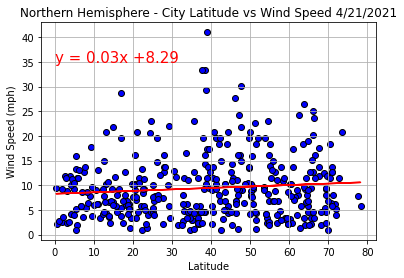

In [98]:
plt.scatter(northern_df["Lat"],northern_df["Wind Speed"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs Wind Speed 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"],northern_df["Wind Speed"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This graph is plotting wind speed at the locations latitude in the northern hemisphere. There does not appear to be a \npattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.002133665269197465
This graph is plotting wind speed at the locations latitude in the southern hemisphere. There does not appear to be a 
pattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.


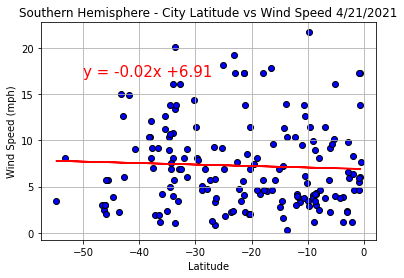

In [99]:
plt.scatter(southern_df["Lat"],southern_df["Wind Speed"],color = "blue", marker = "o", edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs Wind Speed 4/21/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"],southern_df["Wind Speed"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("This graph is plotting wind speed at the locations latitude in the southern hemisphere. There does not appear to be a \npattern or trend. This can be confirmed by the r-value which is in the range of no or negligible correlation.")

Three observable trends:<br>
-Tempatures tend to increases as you get closer to the equator.<br>
-Temaptures trend downward as you mover further from the equator.<br>
-Humidity, cloudiness, & wind speed do not have a notable trends or correlation when plotting by latitude\n